<a href="https://colab.research.google.com/github/Kabanosk/ml/blob/main/wallpaper-generation-using-GAN-inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

#%matplotlib inline
import argparse
import os
import random
import time
import numpy as np

import torch
import torch.nn as nn

import torchvision.transforms as transforms
import pickle

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

manualSeed = 999
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

drive.mount('/content/drive')

Random Seed:  999
Mounted at /content/drive


In [ ]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)


In [ ]:
netG = pickle.load(open('drive/MyDrive/saved_models/d50netG.pkl', 'rb'))

In [ ]:
images = []
t = transforms.ToPILImage()
fixed_noise = torch.randn(64, 100, 1, 1, device='cuda')
fake = netG(fixed_noise).detach().cpu()
for i in range(64):
    images.append(t(fake[i]))

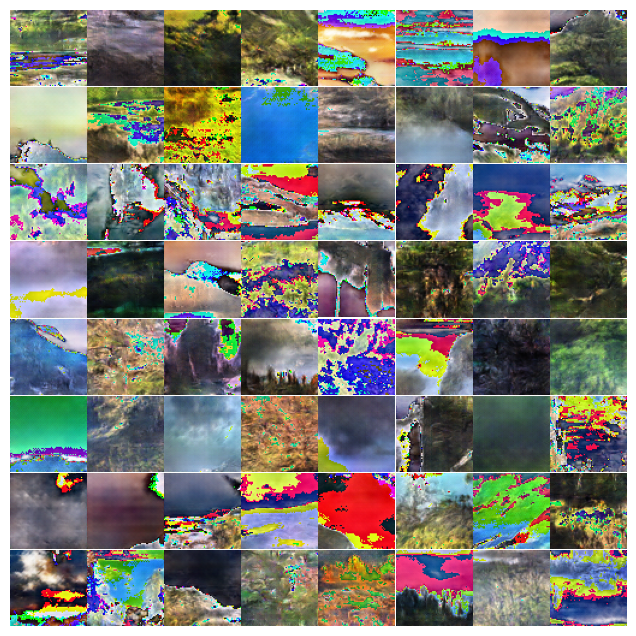

In [ ]:
fig = plt.figure(figsize=(8, 8))

grid = ImageGrid(fig, 111,
                 nrows_ncols=(8, 8),
                 axes_pad=0.01)

for ax, im in zip(grid, images):
    ax.axis('off')
    ax.imshow(im)

plt.show()

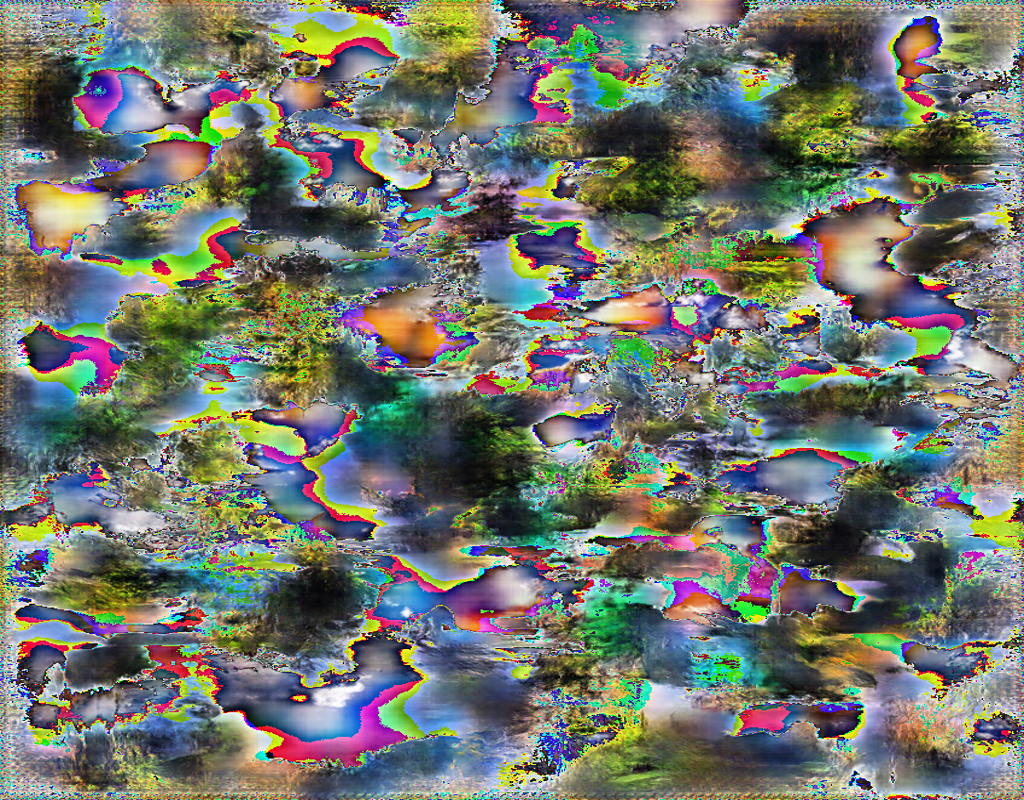

In [ ]:
fixed_noise = torch.randn(1, 100, 50, 50, device='cuda')
fake = netG(fixed_noise).detach().cpu()[0]
photo = t(fake).resize((1024,800))
photo.save('drive/MyDrive/output/super.png')
photo